In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')


# Connect to the SQL database
conn = sqlite3.connect('/Users/habeeb/Downloads/Accident.db')

In [86]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/Users/habeeb/Downloads/Accident.db')

# Get a cursor
cursor = conn.cursor()

# Query to fetch all table names in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor.execute(query)

# Fetch all table names
table_names = cursor.fetchall()

# Print the table names
for name in table_names:
    print(name[0])

# Close the cursor and connection


accident
casualty
vehicle
lsoa


In [87]:
# Query to retrieve accident data and timestamp
query = """
SELECT *
FROM Accident
WHERE accident_year =2020 
"""
accident=pd.read_sql(query, conn)

In [88]:
accident.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [197]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [176]:
accident['police_force'].

0    1
1    1
2    1
3    1
4    1
Name: police_force, dtype: int64

In [151]:
accident['lsoa_of_accident_location']

0        E01004576
1        E01003034
2        E01004726
3        E01003617
4        E01004763
           ...    
91194           -1
91195           -1
91196           -1
91197           -1
91198           -1
Name: lsoa_of_accident_location, Length: 91199, dtype: object

## Q1.

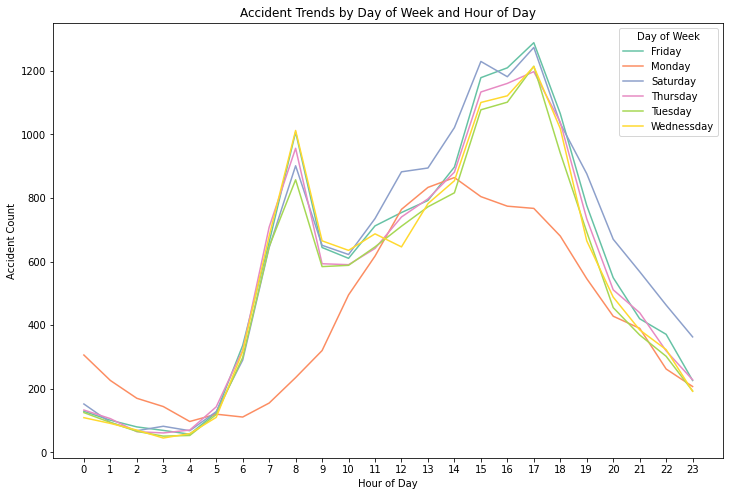

In [89]:
# Combine date and time columns into a single datetime column
df=accident.copy()
df['time'] = pd.to_datetime(df['time'])

# Extract hour from the datetime
df['HourOfDay'] = df['time'].dt.hour

# Mapping day of the week to actual names
day_of_week_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednessday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
df['DayOfWeek'] = df['day_of_week'].map(day_of_week_map)

# Group by day of the week, hour, and count accidents
accidents_by_day_hour = df.groupby(['DayOfWeek', 'HourOfDay']).size().reset_index(name='AccidentCount')

# Create a line plot to show trends of accidents throughout the day
plt.figure(figsize=(12, 8))
sns.lineplot(data=accidents_by_day_hour, x='HourOfDay', y='AccidentCount', hue='DayOfWeek', palette='Set2')
plt.title('Accident Trends by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.show()

## Q2

In [81]:
Vehicle_Query='''
SELECT acc.accident_index, acc.accident_year, acc.time,acc.day_of_week, acc.date, veh.vehicle_index, veh.vehicle_type
FROM accident AS acc
JOIN vehicle AS veh ON acc.accident_index = veh.accident_index
WHERE acc.accident_year = 2020 AND veh.vehicle_type IN (3,4,5)
'''
Specific_Motorcycle = pd.read_sql(Vehicle_Query,conn)
Specific_Motorcycle

,accident_index,accident_year,time,day_of_week,date,vehicle_index,vehicle_type
0,2020010228020,2020,03:25,4,01/01/2020,681728,3
1,2020010228086,2020,14:00,4,01/01/2020,681749,3
2,2020010228097,2020,14:37,4,01/01/2020,681752,3
3,2020010228148,2020,19:05,4,01/01/2020,681774,3
4,2020010228207,2020,14:29,4,01/01/2020,681793,3
...,...,...,...,...,...,...,...
12993,2020991010130,2020,16:30,5,24/12/2020,848911,3
12994,2020991011809,2020,17:30,4,16/12/2020,849008,3
12995,2020991012311,2020,17:55,2,28/12/2020,849017,3
12996,2020991012353,2020,15:45,5,06/08/2020,849020,4


In [82]:
df=Specific_Motorcycle.copy()

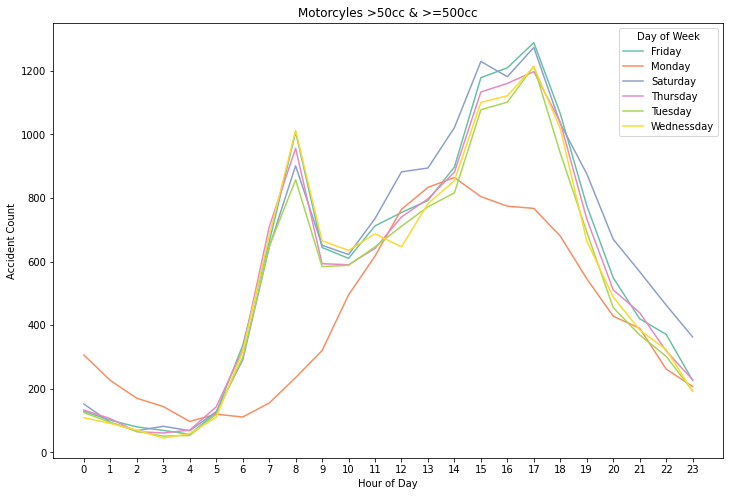

In [91]:
df['time'] = pd.to_datetime(df['time'])

df['HourOfDay'] = df['time'].dt.hour


# Mapping day of the week to actual names
day_of_week_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednessday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
df['DayOfWeek'] = df['day_of_week'].map(day_of_week_map)

# Group by day of the week, hour, and count accidents
accidents_by_day_hour = df.groupby(['DayOfWeek', 'HourOfDay']).size().reset_index(name='AccidentCount')

# Create a line plot to show trends of accidents throughout the day
plt.figure(figsize=(12, 8))
sns.lineplot(data=accidents_by_day_hour, x='HourOfDay', y='AccidentCount', hue='DayOfWeek', palette='Set2')
plt.title('Motorcyles >50cc & >=500cc')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.show()

## Q3

In [93]:
Casualty_Query = ''' 
SELECT acc.accident_index, acc.accident_year, acc.time, acc.day_of_week, cas.casualty_index, cas.casualty_class
FROM accident AS acc
JOIN casualty AS cas ON acc.accident_index = cas.accident_index
WHERE acc.accident_year = 2020 AND cas.casualty_class = 3
'''
Ped_inv = pd.read_sql(Casualty_Query,conn)
Ped_inv

,accident_index,accident_year,time,day_of_week,casualty_index,casualty_class
0,2020010219808,2020,09:00,3,484748,3
1,2020010220496,2020,13:55,2,484749,3
2,2020010220496,2020,13:55,2,484750,3
3,2020010228005,2020,01:25,4,484751,3
4,2020010228006,2020,01:50,4,484752,3
...,...,...,...,...,...,...
14745,2020991023621,2020,10:30,3,600321,3
14746,2020991023880,2020,17:00,2,600322,3
14747,2020991024526,2020,12:00,3,600326,3
14748,2020991029573,2020,15:05,6,600328,3


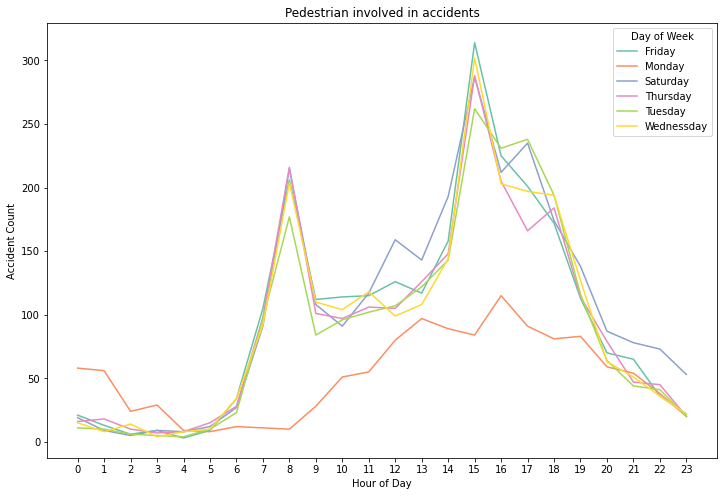

In [97]:
df=Ped_inv.copy()
df['time'] = pd.to_datetime(df['time'])

df['HourOfDay'] = df['time'].dt.hour


# Mapping day of the week to actual names
day_of_week_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednessday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
df['DayOfWeek'] = df['day_of_week'].map(day_of_week_map)

# Group by day of the week, hour, and count accidents
accidents_by_day_hour = df.groupby(['DayOfWeek', 'HourOfDay']).size().reset_index(name='AccidentCount')

# Create a line plot to show trends of accidents throughout the day
plt.figure(figsize=(12, 8))
sns.lineplot(data=accidents_by_day_hour, x='HourOfDay', y='AccidentCount', hue='DayOfWeek', palette='Set2')
plt.title('Pedestrian involved in accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.show()

## Q4

In [139]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import sqlite3

# Load data from your database
conn = sqlite3.connect('/Users/habeeb/Downloads/Accident.db')
query = """
SELECT speed_limit,road_surface_conditions, weather_conditions, accident_severity
FROM accident
"""
df = pd.read_sql(query, conn)


In [140]:
df.head()

,speed_limit,road_surface_conditions,weather_conditions,accident_severity
0,30,1,1,1
1,30,2,1,3
2,30,1,1,3
3,30,2,2,3
4,20,2,1,2


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   speed_limit              461352 non-null  int64
 1   road_surface_conditions  461352 non-null  int64
 2   weather_conditions       461352 non-null  int64
 3   accident_severity        461352 non-null  int64
dtypes: int64(4)
memory usage: 14.1 MB


In [144]:
# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['speed_limit','road_surface_conditions', 'weather_conditions'])

# Convert one-hot encoded columns to boolean values
for column in df_encoded.columns:
    df_encoded[column] = df_encoded[column].astype(bool)

# Prepare transaction dataset
transactions = df_encoded.drop(['accident_severity'], axis=1)

# Apply Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print association rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
                                          antecedents  \
0                                    (speed_limit_30)   
1                         (road_surface_conditions_1)   
2                              (weather_conditions_1)   
3                                    (speed_limit_30)   
4                              (weather_conditions_1)   
5                         (road_surface_conditions_1)   
6              (weather_conditions_1, speed_limit_30)   
7   (weather_conditions_1, road_surface_conditions_1)   
8         (speed_limit_30, road_surface_conditions_1)   
9                              (weather_conditions_1)   
10                                   (speed_limit_30)   
11                        (road_surface_conditions_1)   

                                          consequents   support  confidence  \
0                         (road_surface_conditions_1)  0.435284    0.731280   
1                                    (speed_limit_30)  0.435284    0.611893   
2 

In [143]:
frequent_itemsets

,support,itemsets
0,0.595235,(speed_limit_30)
1,0.125787,(speed_limit_60)
2,0.711372,(road_surface_conditions_1)
3,0.258540,(road_surface_conditions_2)
4,0.795436,(weather_conditions_1)
5,0.116974,(weather_conditions_2)
6,0.435284,"(speed_limit_30, road_surface_conditions_1)"
7,0.143311,"(speed_limit_30, road_surface_conditions_2)"
8,0.476458,"(weather_conditions_1, speed_limit_30)"
9,0.673037,"(weather_conditions_1, road_surface_conditions_1)"


In [145]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_limit_30),(road_surface_conditions_1),0.595235,0.711372,0.435284,0.731280,1.027985,0.011850,1.074084,0.067257
1,(road_surface_conditions_1),(speed_limit_30),0.711372,0.595235,0.435284,0.611893,1.027985,0.011850,1.042920,0.094319
2,(weather_conditions_1),(speed_limit_30),0.795436,0.595235,0.476458,0.598990,1.006308,0.002987,1.009363,0.030644
3,(speed_limit_30),(weather_conditions_1),0.595235,0.795436,0.476458,0.800454,1.006308,0.002987,1.025146,0.015487
4,(weather_conditions_1),(road_surface_conditions_1),0.795436,0.711372,0.673037,0.846123,1.189424,0.107186,1.875710,0.778520
5,(road_surface_conditions_1),(weather_conditions_1),0.711372,0.795436,0.673037,0.946111,1.189424,0.107186,3.796023,0.551774
6,"(weather_conditions_1, speed_limit_30)",(road_surface_conditions_1),0.476458,0.711372,0.410504,0.861575,1.211144,0.071565,2.085077,0.332991
7,"(weather_conditions_1, road_surface_conditions_1)",(speed_limit_30),0.673037,0.595235,0.410504,0.609928,1.024684,0.009889,1.037667,0.073677
8,"(speed_limit_30, road_surface_conditions_1)",(weather_conditions_1),0.435284,0.795436,0.410504,0.943073,1.185605,0.064264,3.593451,0.277217
9,(weather_conditions_1),"(speed_limit_30, road_surface_conditions_1)",0.795436,0.435284,0.410504,0.516075,1.185605,0.064264,1.166949,0.765281


## Q5. 

In [193]:
# Query to retrieve accident data and timestamp
query = """
SELECT acc.accident_year, acc.speed_limit,acc.police_force, acc.accident_severity, acc.latitude, acc.longitude, l.lsoa01cd, l.lsoa01nm,l.shape__area,l.shape__length
FROM accident AS acc
JOIN lsoa AS l ON acc.lsoa_of_accident_location = l.lsoa01cd
WHERE l.lsoa01nm like '%Kingston upon Hull%' and acc.accident_year =2020
"""

ls=pd.read_sql(query, conn)

In [194]:
ls.head()

,accident_year,speed_limit,police_force,accident_severity,latitude,longitude,lsoa01cd,lsoa01nm,shape__area,shape__length
0,2020,30,16,3,53.744936,-0.393424,E01012777,Kingston upon Hull 028E,3.567509e+05,3963.099631
1,2020,30,16,2,53.791630,-0.324858,E01012788,Kingston upon Hull 002E,4.380009e+05,4731.122554
2,2020,30,16,3,53.767805,-0.327733,E01012817,Kingston upon Hull 016D,1.798393e+06,7836.548217
3,2020,30,16,3,53.750410,-0.309102,E01012810,Kingston upon Hull 026D,9.637633e+05,7120.401224
4,2020,30,16,3,53.777540,-0.335481,E01012817,Kingston upon Hull 016D,1.798393e+06,7836.548217


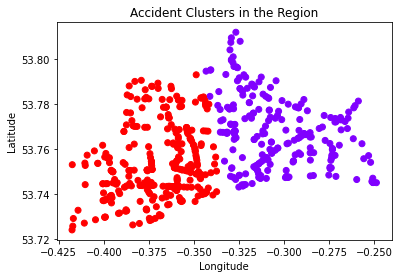

In [196]:
# Perform any necessary data preprocessing (e.g., normalization)
df=ls.copy()
# Apply K-means clustering
num_clusters = 2
# Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(df[['latitude','longitude']])

# Visualize clusters
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Clusters in the Region')
plt.show()

## Q6

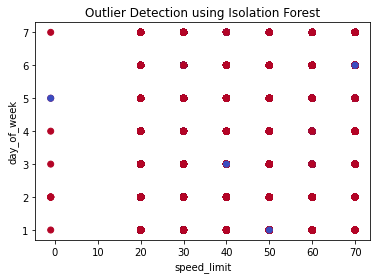

Number of outliers: 912


In [210]:
data=accident.dropna()
# Select numerical features for outlier detection
numerical_features = data.select_dtypes(include=[np.number])

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination based on your data

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(numerical_features)

# Add outlier predictions to the original dataset
data['outlier'] = outlier_preds

# Visualize outliers
plt.scatter(data['speed_limit'], data['day_of_week'], c=data['outlier'], cmap='coolwarm')
plt.xlabel('speed_limit')
plt.ylabel('day_of_week')
plt.title('Outlier Detection using Isolation Forest')
plt.show()

# Print statistics about outliers
print("Number of outliers:", (outlier_preds == -1).sum())

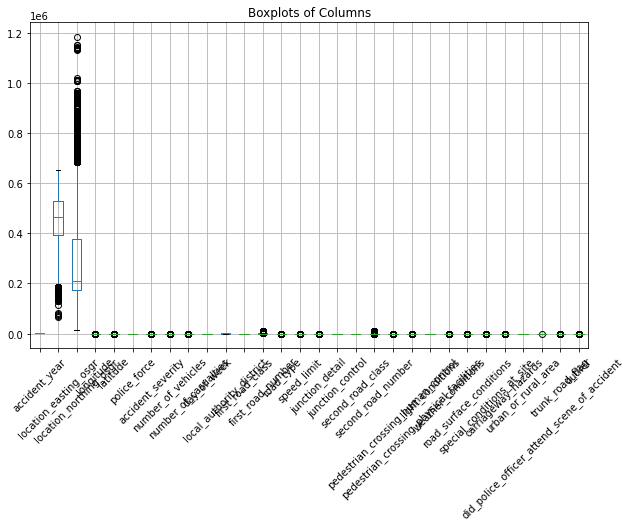

In [209]:
# Create boxplots for all columns
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplots of Columns')
plt.xticks(rotation=45)
plt.show()

In [211]:
vehicle_data = pd.read_sql_query("SELECT age_of_driver, age_of_vehicle FROM vehicle", conn)

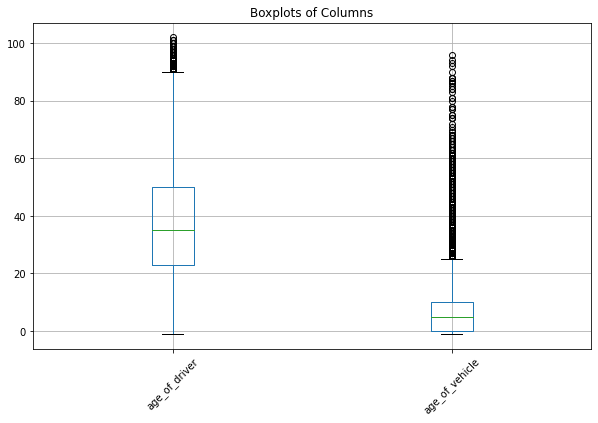

In [212]:
# Create boxplots for all columns
plt.figure(figsize=(10, 6))
vehicle_data.boxplot()
plt.title('Boxplots of Columns')
plt.xticks(rotation=45)
plt.show()

## Q7

In [213]:
pip install pycaret


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [214]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(accident, target = 'accident_severity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,accident_severity
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(91185, 37)"
5,Transformed data shape,"(91185, 37)"
6,Transformed train set shape,"(63829, 37)"
7,Transformed test set shape,"(27356, 37)"
8,Numeric features,29
9,Categorical features,7


In [215]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [216]:
exp

In [217]:
# init setup on exp
exp.setup(accident, target = 'accident_severity', session_id = 123)

,Description,Value
0,Session id,123
1,Target,accident_severity
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(91185, 37)"
5,Transformed data shape,"(91185, 37)"
6,Transformed train set shape,"(63829, 37)"
7,Transformed test set shape,"(27356, 37)"
8,Numeric features,29
9,Categorical features,7


In [218]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7842,0.0000,0.7842,0.7146,0.6958,0.0231,0.0706,1.0000
dummy,Dummy Classifier,0.7835,0.5000,0.7835,0.6138,0.6883,0.0000,0.0000,1.1070
lr,Logistic Regression,0.7834,0.5722,0.7834,0.6541,0.6884,0.0000,0.0011,5.8760
ada,Ada Boost Classifier,0.7823,0.6247,0.7823,0.6999,0.6948,0.0204,0.0543,3.2960
et,Extra Trees Classifier,0.7809,0.6523,0.7809,0.7026,0.7008,0.0379,0.0752,9.3690
rf,Random Forest Classifier,0.7766,0.6044,0.7766,0.6741,0.6937,0.0142,0.0299,7.4650
lda,Linear Discriminant Analysis,0.7763,0.6720,0.7763,0.7039,0.7147,0.0946,0.1282,2.8830
gbc,Gradient Boosting Classifier,0.7665,0.6083,0.7665,0.6783,0.6987,0.0341,0.0493,23.8020
knn,K Neighbors Classifier,0.7470,0.5547,0.7470,0.6761,0.7002,0.0487,0.0561,3.5000
nb,Naive Bayes,0.7320,0.5905,0.7320,0.6778,0.6976,0.0627,0.0675,1.1370


In [219]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…